In [16]:
import numpy as np
import argparse
import time
import os
import sys
import pickle
from itertools import chain
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

from datasets import inputs, sf_inputs_discrete
from sr_model.models.models import AnalyticSR, STDP_SR, OjaRNN, Linear
import configs
from eval import eval

device = 'cpu'

In [45]:
oja_dir = '../trained_models/05_oja1E-4_sf_loss/oja/'
oja3_dir = '../trained_models/05_oja1E-3_sf_loss/oja/'
oja5_dir = '../trained_models/05_oja5E-4_sf_loss/oja/'
sf_dir = '../trained_models/05_oja1E-3_sf_loss/rnn/'

In [53]:
steps = []
losses = []
models = []

for _iter in os.listdir(sf_dir):
    iter_dir = f'{sf_dir}{_iter}/'
    for file in os.listdir(iter_dir):
        if 'tfevents' not in file: continue
        tfevents_file = f'{iter_dir}{file}'
        event_acc = EventAccumulator(tfevents_file)
        event_acc.Reload()
        scalar_events = event_acc.Scalars('loss_train')
        for i in range(len(scalar_events)):
            steps.append(scalar_events[i].step)
            losses.append(scalar_events[i].value)
            models.append(r'RNN-SF $\eta=10^{-2}$')
        break
        
for _iter in os.listdir(oja_dir):
    iter_dir = f'{oja_dir}{_iter}/'
    for file in os.listdir(iter_dir):
        if 'tfevents' not in file: continue
        tfevents_file = f'{iter_dir}{file}'
        event_acc = EventAccumulator(tfevents_file)
        event_acc.Reload()
        scalar_events = event_acc.Scalars('loss_train')
        for i in range(len(scalar_events)):
            steps.append(scalar_events[i].step)
            losses.append(scalar_events[i].value)
            models.append(r'Oja $\eta=1\times10^{-4}$')
        break

for _iter in os.listdir(oja5_dir):
    iter_dir = f'{oja5_dir}{_iter}/'
    for file in os.listdir(iter_dir):
        if 'tfevents' not in file: continue
        tfevents_file = f'{iter_dir}{file}'
        event_acc = EventAccumulator(tfevents_file)
        event_acc.Reload()
        scalar_events = event_acc.Scalars('loss_train')
        for i in range(len(scalar_events)):
            steps.append(scalar_events[i].step)
            losses.append(scalar_events[i].value)
            models.append(r'Oja $\eta=5\times10^{-4}$')
        break

for _iter in os.listdir(oja3_dir):
    iter_dir = f'{oja3_dir}{_iter}/'
    for file in os.listdir(iter_dir):
        if 'tfevents' not in file: continue
        tfevents_file = f'{iter_dir}{file}'
        event_acc = EventAccumulator(tfevents_file)
        event_acc.Reload()
        scalar_events = event_acc.Scalars('loss_train')
        for i in range(len(scalar_events)):
            steps.append(scalar_events[i].step)
            losses.append(scalar_events[i].value)
            models.append(r'Oja $\eta=1\times10^{-3}$')
        break

In [54]:
df = pd.DataFrame({'Steps': steps, 'Losses': losses, 'Models': models})

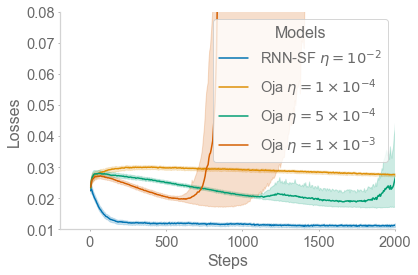

In [56]:
plt.figure()
sns.lineplot(x='Steps', y='Losses', hue='Models', data=df)
plt.ylim(0.01, 0.08)
plt.xlim(right=2000)
plt.savefig('oja_rnn_loss.png', dpi=300)
plt.show()